<a href="https://colab.research.google.com/github/ailab-nda/ML/blob/main/%E9%9F%B3%E5%A3%B0%E8%AA%8D%E8%AD%98%EF%BC%88%E8%AC%9B%E7%BE%A9%E5%AE%A4%E7%94%A8%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab音声認識の例（講義室用）

## 1. 準備

### (1) ソフトのインストール

In [4]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.2.2-2.1ubuntu2.5).
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 46 not upgraded.
Need to get 188 kB of archives.
After this operation, 926 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libportaudio2 amd64 19.6.0-1build1 [65.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libportaudiocpp0 amd64 19.6.0-1build1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 portaudio19-dev amd64 19.6.0-1build1 [106 kB]
Fetched 188 kB in 0s (588 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 122541 files and directories currently installe

### (3) ブラウザからマイクを使う設定


In [1]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec, filename='audio.wav'):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec * 1000))
  b = b64decode(s.split(',')[1])
  with open(filename, 'wb+') as f:
    f.write(b)



## 2. 音声認識

In [9]:
audiofile = "audio.wav"
second = 5
print(f"Speak to your microphone {second} sec...")
record(second, audiofile)
print("Done!")

Speak to your microphone 3 sec...


<IPython.core.display.Javascript object>

Done!


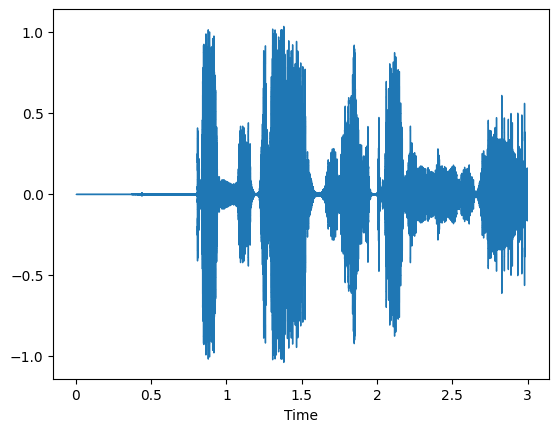

In [10]:
# 波形プロットにより録音を確認
# UserWarning: PySoundFile failed. Trying audioread instead. が出るが、無視して問題ない
import librosa
import librosa.display
speech, rate = librosa.load(audiofile, sr=16000)
librosa.display.waveshow(speech, sr=rate)

In [12]:
import IPython.display
IPython.display.Audio("audio.wav", autoplay=True)